Correlation Analyze between Production parameters and Defect occurrence

In [1]:
import pandas as pd                       # importing pandas libarary, pyton data analysis library 

import numpy as np                        # importing numpy or python array object library 
import seaborn as sn
import matplotlib.pyplot as plt           # importing matplotlib library, python data visualization library 
%matplotlib inline
import statistics as st 

from sklearn import preprocessing         # Import label encoder 

#from scipy import stats
#from scipy.stats import norm

#from numpy import loadtxt

#from IPython.display import HTML, display
#import tabulate


Load data set

In [2]:
df = pd.read_excel("C:/Users/Asus/Desktop/Data/research/Processed - Book1.xlsx")

In [3]:
df.head()

,S.G.,Height,CTR,Viscosity,Former_Cooling_Tank_Temperature,Former_Cooling_Tank_Height,Former_Temperature,Chain_Speed,Z-01_Oven_Temperature,Z-02_Oven_Temperature,...,Defect_Type:OD,Defect_Type:PD,Defect_Type:PF,Defect_Type:PH,Defect_Type:PT,Defect_Type:HD,Defect_Type:SD,Defect_Type:WEB,Defect_Type:WR,Rejection
0,0.805,14.7,0,31.0,48.2,16.0,44.7,3,33,100,...,0,1,1,1,0,0,1,0,0,1
1,0.805,14.7,0,31.0,48.2,16.0,43.3,3,33,103,...,0,0,0,0,0,0,0,0,0,0
2,0.805,14.7,0,31.5,48.2,16.0,44.9,3,34,102,...,0,0,0,1,0,0,0,0,0,2
3,0.805,14.7,0,31.5,48.2,16.0,43.6,3,34,104,...,0,0,0,0,0,0,0,0,0,2
4,0.805,14.7,0,31.5,48.2,16.0,44.8,3,35,105,...,0,0,0,0,0,0,0,0,0,2


In [4]:
# Remove all columns between column name 'Defect Type:  CD' to 'Reject / Not Reject' 
# as they are not related to defect occurence 

df.drop(df.loc[:, "Defect_Type:CD" : "Rejection"].columns, axis = 1, inplace=True) 

Correlation Matrix

In [5]:
df.corr()

,S.G.,Height,CTR,Viscosity,Former_Cooling_Tank_Temperature,Former_Cooling_Tank_Height,Former_Temperature,Chain_Speed,Z-01_Oven_Temperature,Z-02_Oven_Temperature,...,Z-06_Oven_Temperature,Tem-02,TDS-02,Tem-03,TDS-03,Tem-04,TDS-04,Humidity,Room_Temperature,Defect_Occurrence
S.G.,1.000000,NaN,NaN,0.588179,-0.431973,-0.408248,-0.254598,NaN,-0.523492,-0.337097,...,-0.489422,0.223727,-0.146427,-0.007195,0.254885,0.244688,0.311357,-0.125623,0.051836,0.082680
Height,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CTR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Viscosity,0.588179,NaN,NaN,1.000000,-0.490286,-0.788489,-0.083868,NaN,-0.376814,-0.305256,...,-0.523069,0.560885,0.138546,0.098509,0.307270,0.117682,0.242714,-0.071642,-0.005513,-0.047852
Former_Cooling_Tank_Temperature,-0.431973,NaN,NaN,-0.490286,1.000000,0.587841,0.045042,NaN,0.076624,0.175850,...,0.262022,-0.565908,0.113276,0.035520,-0.197400,-0.226497,-0.218747,0.179290,-0.124620,0.016197
Former_Cooling_Tank_Height,-0.408248,NaN,NaN,-0.788489,0.587841,1.000000,-0.154696,NaN,0.003387,0.072663,...,0.233481,-0.618486,0.001329,-0.023498,-0.094294,-0.099894,-0.010281,0.158467,-0.100342,-0.025717
Former_Temperature,-0.254598,NaN,NaN,-0.083868,0.045042,-0.154696,1.000000,NaN,0.382442,0.285124,...,0.201165,-0.086032,-0.065944,0.055871,-0.297838,-0.141284,-0.352439,-0.243678,0.111379,0.025849
Chain_Speed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Z-01_Oven_Temperature,-0.523492,NaN,NaN,-0.376814,0.076624,0.003387,0.382442,NaN,1.000000,0.516975,...,0.359576,-0.067734,0.010847,-0.051333,-0.259819,-0.087450,-0.261884,-0.184797,0.162926,0.083095
Z-02_Oven_Temperature,-0.337097,NaN,NaN,-0.305256,0.175850,0.072663,0.285124,NaN,0.516975,1.000000,...,0.509972,-0.305619,-0.195320,-0.181533,-0.393007,-0.106725,-0.392224,0.039702,-0.025851,0.158499


Correlation Plot

Text(0.5, 1.05, 'Correlation of Support Glove Production Parameters')

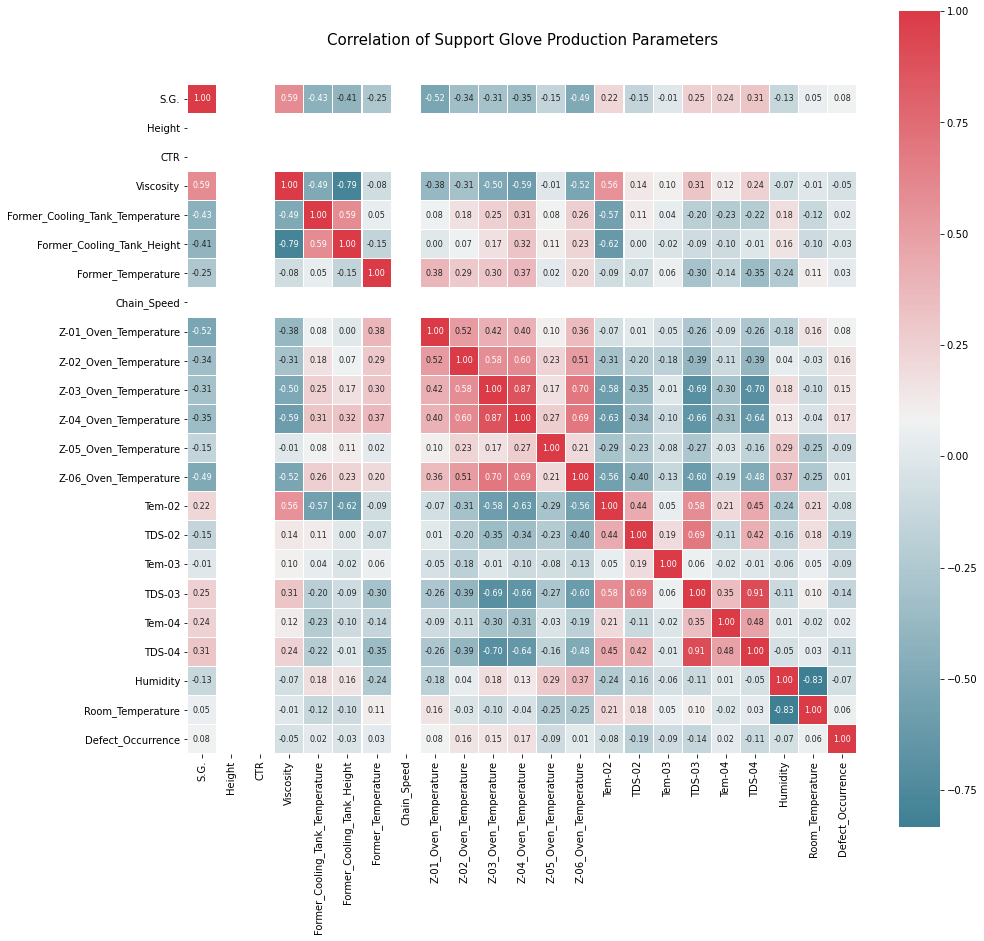

In [6]:
fig, ax = plt.subplots()

colormap = sn.diverging_palette(220, 10, as_cmap = True)
fig.set_size_inches(15, 15)

sn.heatmap(df.corr(), cbar = True, square = True, fmt= '.2f', cmap=colormap , ax=ax, annot=True, annot_kws={'size': 8},
           linewidths=0.1, linecolor='white')
plt.title('Correlation of Support Glove Production Parameters', y=1.05, size=15)